In [1]:
from ProwlsControl import ProwlsControl
pc = ProwlsControl(port='COM5')
#pc.laser_toggle_on()



Lock-In Connection:
Stanford_Research_Systems,SR830,s/n46458,ver1.07 


Labjack Info:
Device type: 7, Connection type: 1,
Serial number: 470035776, IP address: 0.0.0.0, Port: 0,
Max bytes per MB: 64

Power Supply Connection:
Agilent Technologies,E3647A,0,2.4-6.1-2.1



In [4]:
pc.laser_toggle_on()
#pc.multiscan(119.7,121.5,0.05,ftol=0.001,meas_time=0.01,nscans=2)
pc.multiscan(119,121,1,ftol=0.1,meas_time=0.01,nscans=4)
#pc.timestream(140,ftol=0.01,meas_time=5)

[                Time   Frequency  Lockin X  Lockin Y  Lockin R Lockin Theta  \
 0  1754579071.437675  119.096834  0.000021  0.000001  0.000021        2.148   
 1  1754579073.202354  119.904667  0.000032  0.000001  0.000032        1.644   
 2  1754579074.883144  120.906139  0.000038  0.000001  0.000038         1.23   
 
     Temp pmix Heater Power pmix  
 0  293.904953          0.000023  
 1  293.810219          0.000023  
 2  293.770747          0.000023  ,
                 Time   Frequency  Lockin X  Lockin Y  Lockin R Lockin Theta  \
 0  1754579078.933928  119.091626  0.000024  0.000001  0.000024        2.034   
 1   1754579080.68417  119.905355  0.000029  0.000001  0.000029        1.674   
 2  1754579082.353019  120.905162  0.000031  0.000001  0.000031         1.47   
 
     Temp pmix Heater Power pmix  
 0  293.604963          0.000023  
 1  293.912847          0.000022  
 2  293.952319          0.000022  ,
                 Time   Frequency  Lockin X  Lockin Y  Lockin R Lockin The

In [12]:
pc.laser_toggle_off()

In [9]:
pc.io.load_multiscan('..\\Data\\Multiscans\\multiscan_data_07082025_100146.pkl')

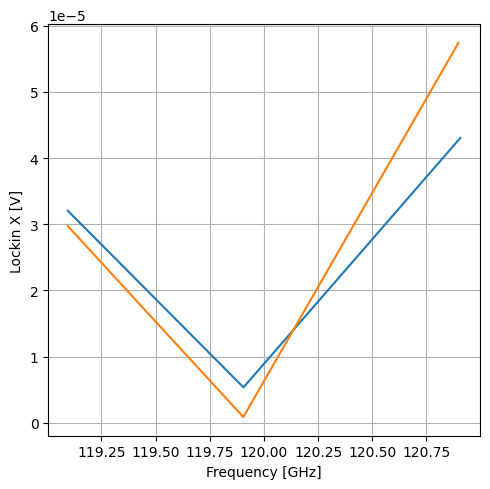

In [11]:
pc.plot.plot_multiscan();

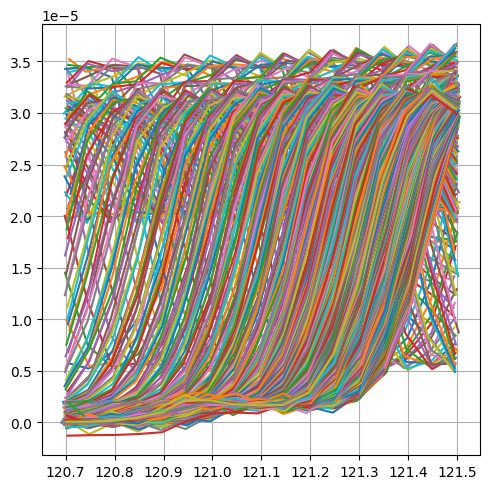

In [11]:
fignum = 1
fig = plt.figure(fignum,figsize=(5,5))

for scanidx,scan in enumerate(pc.multiscan_data):
    plt.plot(scan['Frequency'],scan['Lockin X'])       


plt.tight_layout()
plt.grid(True)
plt.show()


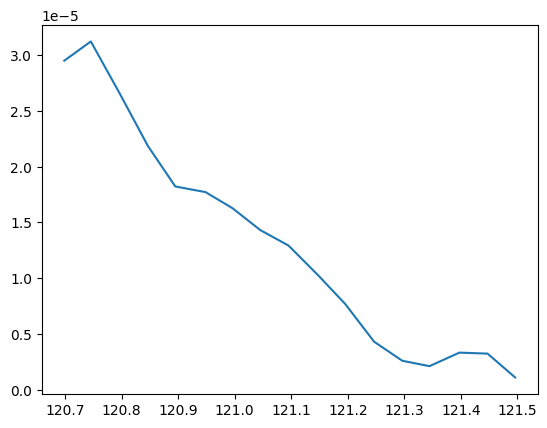

In [3]:

import matplotlib.pyplot as plt
plt.figure()
plt.plot(pc.scan_data['Frequency'],pc.scan_data['Lockin X'])
plt.show()